In [2]:

import os 

import warnings

warnings.simplefilter('ignore')

# Import default_timer to compute durations
from timeit import default_timer as timer
start_time=timer()

# Importing numpy 
import numpy as np

# Importing Scipy 
import scipy as sp

# Importing Pandas Library 
import pandas as pd

# import glob function to scrap files path
from glob import glob

# import display() for better visualitions of DataFrames and arrays
from IPython.display import display



# import pyplot for plotting
import matplotlib.pyplot as plt

plt.style.use('bmh') # for better plots

## Load accelerometer dataset 

In [5]:
def load_acc_dataset(df):
    data = pd.read_csv(df , error_bad_lines = False , engine = 'c' , encoding = 'utf-8' , header = 1)
    data.columns = ['dateentry' , 'deviceid' , 'acc_x' , 'acc_y' , 'acc_z' , 'pitch' , 'roll' , 'yaw' , 'date' ]
    del data['date']
    return data 






accelerometer_data = load_acc_dataset('accelerometer.csv')

Phone_poche = load_acc_dataset('accelerometer_iphone_poche_extract2.csv')

verticalite_acc_data = load_acc_dataset('verticalite_accelerometer_28_04_2020.csv')

Phone_fixe_df = accelerometer_data[accelerometer_data.deviceid == 'unknown_1563053406#ANONYMOUSTOKEN2536']

b'Skipping line 150771: expected 9 fields, saw 12\n'


# Load gyroscope dataset

In [6]:
def load_dataset(df):
    data = pd.read_csv(df , error_bad_lines = False , engine = 'c' , encoding = 'utf-8' , header = 1)
    data.columns = ['dateentry' , 'deviceid' , 'gyro_x' , 'gyro_y' , 'gyro_z' , 'pitch' , 'roll' , 'yaw' , 'date' ]
    del data['date']
    return data 

verticalite_gyro_data = load_dataset('verticalite_gyroscope_28_04_2020.csv')

# Load gps dataset 

In [7]:
def load_dataset(df):
    data = pd.read_csv(df , error_bad_lines = False , engine = 'c' , encoding = 'utf-8' , header = 1)
    data.columns = ['dateentry' , 'deviceid' , 'latitude' , 'longitude' , 'altitude' , 'bearing' , 'speed' , 'accuracy']
    return data 

verticalite_gps_data = load_dataset('verticalite_gps_28_04_2020.csv')

In [8]:
print(f"Données issus du téléphone posé sur le support fixe {display(Phone_fixe_df.head(2))}")

print(f"Données issus du téléphone en poche {display(Phone_poche.head(2))}")

print(f"Données issus du téléphone posé sur le support fixe deuxième captation: accelerometre {display(verticalite_acc_data.head(2))}")

print(f"Données issus du téléphone posé sur le support fixe deuxième captation: gyroscope {display(verticalite_gyro_data.head(2))}")

print(f"Données issus du téléphone posé sur le support fixe deuxième captation: gps {display(verticalite_gps_data.head(2))}")


,dateentry,deviceid,acc_x,acc_y,acc_z,pitch,roll,yaw
0,1575271194806,unknown_1563053406#ANONYMOUSTOKEN2536,-0.092984,0.878751,0.410030,0.223003,-1.124534,2.995621
2,1575271194821,unknown_1563053406#ANONYMOUSTOKEN2536,-0.049773,0.853118,0.366819,0.134865,-1.161399,2.933950


Données issus du téléphone posé sur le support fixe None


,dateentry,deviceid,acc_x,acc_y,acc_z,pitch,roll,yaw
0,1580495825360,8928B6C5-C36A-44B5-BBBF-12100FC55298#ANONYMOUS...,-0.819275,0.541763,-0.176636,-0.572641,-1.348868,-0.462344
1,1580324289814,8928B6C5-C36A-44B5-BBBF-12100FC55298#ANONYMOUS...,-0.678116,0.658081,-0.218063,-0.757051,-1.290942,-0.356489


Données issus du téléphone en poche None


,dateentry,deviceid,acc_x,acc_y,acc_z,pitch,roll,yaw
0,1588081456869,unknown_1563053406#ANONYMOUSTOKEN2536,-0.092984,1.023764,0.515983,0.178295,-1.097497,0.568647
1,1588081238873,unknown_1563053406#ANONYMOUSTOKEN2536,-0.023895,1.008628,0.413204,0.057765,-1.181397,-2.842648


Données issus du téléphone posé sur le support fixe deuxième captation: accelerometre None


,dateentry,deviceid,gyro_x,gyro_y,gyro_z,pitch,roll,yaw
0,1588063368441,unknown_1563053406#ANONYMOUSTOKEN2536,-0.150424,0.046830,-0.021879,-0.116351,-1.006427,-1.324905
1,1588062671058,unknown_1563053406#ANONYMOUSTOKEN2536,-0.244431,-0.734079,-1.137529,-0.126605,-0.259260,-2.936523


Données issus du téléphone posé sur le support fixe deuxième captation: gyroscope None


,dateentry,deviceid,latitude,longitude,altitude,bearing,speed,accuracy
0,1588112111344,unknown_1563053406#ANONYMOUSTOKEN2536,48.845793,2.491227,117.799995,0.000000,0.000000,16.903
1,1588062752391,unknown_1563053406#ANONYMOUSTOKEN2536,48.845971,2.491274,116.500000,1.034463,1.749597,18.039


Données issus du téléphone posé sur le support fixe deuxième captation: gps None


# Data preprocessing 

In [11]:
def preprocessing(df):
    df['dateentry'] = pd.to_datetime(df.dateentry , unit = 'ms')
    df = df.drop_duplicates()
    
    
    
    
    return df.sort_values(by = ['dateentry'] , ascending = True)
    
    
    
Phone_fixe_df = preprocessing(Phone_fixe_df)
Phone_poche_df = preprocessing(Phone_poche)
verticalite_acc_data = preprocessing(verticalite_acc_data)
verticalite_gyro_data = preprocessing(verticalite_gyro_data)
verticalite_gps_data = preprocessing(verticalite_gps_data)


# Make a copy of the raw data processed

In [18]:
    
Phone_fixe_df_copy = Phone_fixe_df.copy()
Phone_poche_copy = Phone_poche_df.copy()
verticalite_acc_data_copy = verticalite_acc_data.copy()
verticalite_gyro_data_copy = verticalite_gyro_data.copy()
verticalite_gps_data_copy = verticalite_gps_data.copy()

# Multiply by gravity 

In [304]:
Phone_fixe_df_copy[['pitch' , 'roll' , 'yaw']] *= 0.985 
Phone_poche_copy[['pitch' , 'roll' , 'yaw']] *= 0.985 
verticalite_acc_data_copy[['pitch' , 'roll' , 'yaw']] *=0.985

## Visualize Correlation in the data use seaborn subplot 

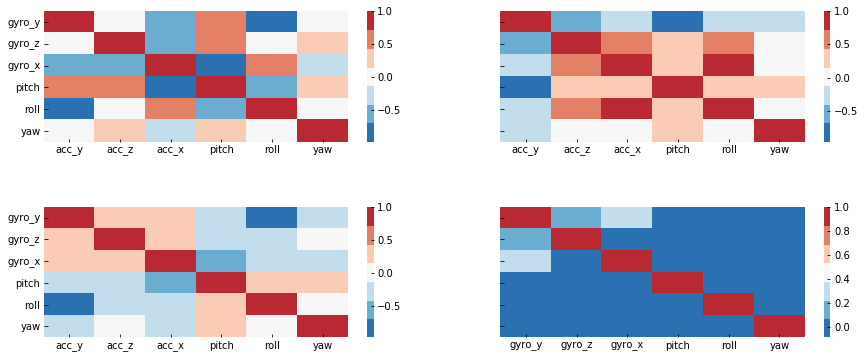

In [305]:


f, p = plt.subplots(2, 2, sharey = True, figsize = (15, 6))
plt.subplots_adjust(hspace = .5)
sns.heatmap(Phone_fixe_df_copy[['acc_y' , 'acc_z' , 'acc_x', 'pitch' , 'roll' , 'yaw']].corr() , cmap =   sns.color_palette('RdBu_r' , 7) , ax = p[0,0])
sns.heatmap(Phone_poche_copy[['acc_y' , 'acc_z' , 'acc_x', 'pitch' , 'roll' , 'yaw']].corr() , cmap =   sns.color_palette('RdBu_r' , 7) , ax = p[0,1])

sns.heatmap(verticalite_acc_data[['acc_y' , 'acc_z' , 'acc_x', 'pitch' , 'roll' , 'yaw']].corr() , cmap =   sns.color_palette('RdBu_r' , 7) , ax = p[1,0])

sns.heatmap(verticalite_gyro_data[['gyro_y' , 'gyro_z' , 'gyro_x', 'pitch' , 'roll' , 'yaw']].corr() , cmap =   sns.color_palette('RdBu_r' , 7) , ax = p[1,1])


# Implémentation de la matrice de rotation 

In [22]:
def rotation_Matrix(df):
    rollMatrix = np.matrix([ # roulis
[1, 0, 0],
[0, np.cos(df.roll), -np.sin(df.roll)],
[0, np.sin(df.roll), np.cos(df.roll)]
])
    
    
    pitchMatrix = np.matrix([  # tangage
[np.cos(df.pitch), 0, np.sin(df.pitch)],
[0, 1, 0],
[-np.sin(df.pitch), 0, np.cos(df.pitch)]
])
    yawMatrix = np.matrix([   # lacet
[np.cos(df.yaw), -np.sin(df.yaw), 0],
[np.sin(df.yaw), np.cos(df.yaw), 0],
[0, 0, 1]
])

    Rotation_Matrix = np.dot(yawMatrix , pitchMatrix , rollMatrix )
    
    return Rotation_Matrix

 

 
rotation_matrix_acc_fixe_data_december = rotation_Matrix(Phone_fixe_df_copy)

 


rotation_matrix_acc_fixe_data_may = rotation_Matrix(verticalite_acc_data_copy)

 


rotation_matrix_gyro_data_may =  rotation_Matrix(verticalite_gyro_data_copy)

In [26]:
#np.transpose(rotation_matrix_acc_fixe_data_may[1]) *  np.array([0,0,-0.9857])                       

# Checks if a matrix is a valid rotation matrix 

In [ ]:
print(f"Il s'agit  en effet d'une matrice de rotation :  {isRotationMatrix(rotation_matrix_acc_fixe_data_december)}")


print(f"Il s'agit  en effet d'une matrice de rotation :  {isRotationMatrix(rotation_matrix_acc_fixe_data_may)}")

print(f"Il s'agit  en effet d'une matrice de rotation :  {isRotationMatrix(rotation_matrix_gyro_data_may)}")

In [391]:


def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)

    I = np.identity(3, dtype = R.dtype)

    n = np.linalg.norm(I - shouldBeIdentity)

    return n < 1e-6



1        1.177569e-16
3        1.841750e-16
5        5.887847e-17
7        2.521025e-16
9        2.419675e-16
             ...     
77990    1.149970e-18
77991    3.142485e-16
77992    2.483815e-16
77993    1.660199e-16
77994    4.063228e-18
Length: 40442, dtype: float64